# Assignment VIII
### Mariam Maeen Ghoniam

# Problem I

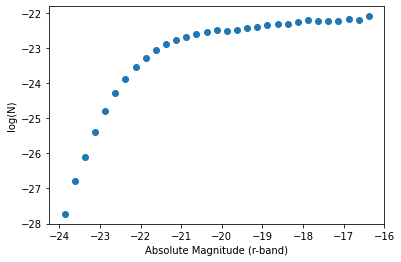

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma,gammainc

c = 299792458 * 10**3
H = 73.8
m_lim = 17.5

derad_r = np.empty(100000, dtype=float)
z = np.empty(100000, dtype=float)
d_r = np.empty(100000, dtype=float)
d_max = np.empty(100000, dtype=float)
V_max = np.empty(100000, dtype=float)
M_r = np.empty(100000, dtype=float)

with open("D:/pycharm projects/Skyserver_Cross.csv") as csv_file:
    csv_reader = csv.reader(csv_file)
    next (csv_reader)
    for i, row in enumerate(csv_reader):
        derad_r [i] = row [5]
        z [i] = row [12]

        
d_r = (c/H) * z
M_r = derad_r - 5 * np.log10(d_r/10)      
d_max = 10 ** ((m_lim - M_r + 5)/5)
V_max = 4 * np.pi * (d_max)**3 / 3


mbins = np.arange(-24,-16,0.25)
hist,edges = np.histogram(M_r,bins=mbins,weights=1/V_max)
bincenters=0.5*(mbins[1:]+mbins[:-1])
logN = np.log10(hist)
plt.xlabel("Absolute Magnitude (r-band)")
plt.ylabel("log(N)")
plt.scatter(bincenters,logN)


### The Montero-Dorta & Prada "All Galaxies" LF
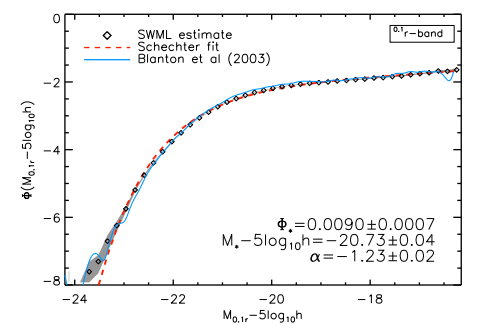

From the equation in the above graph, we can calculate the value of M_* which is callen Mx_star (point on x-axis) in the code below, I then calculated My_star (point on y-axis) value that fits that point on the graph. I used 0.7 as the value of h.

( -21.504509799928716 , -22.95 )


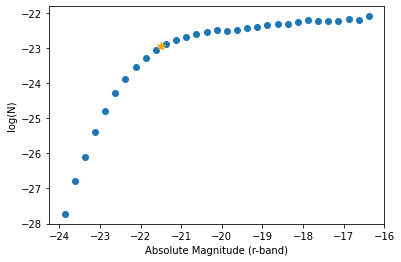

In [15]:
mbins = np.arange(-24,-16,0.25)
hist,edges = np.histogram(M_r,bins=mbins,weights=1/V_max)
bincenters=0.5*(mbins[1:]+mbins[:-1])
logN = np.log10(hist)
plt.xlabel("Absolute Magnitude (r-band)")
plt.ylabel("log(N)")
plt.scatter(bincenters,logN)


Mx_star = -20.73 + 5 * np.log10(0.7)
My_star = -22.95
print("(",Mx_star,",", My_star, ")")
plt.scatter(Mx_star, My_star, marker='*', s=70, c='orange')

M_star should be at the begining of the exponential increase, so it is slightly shifted to the left. The graphs generally fits the Scheshter function except for some fluctuiations at the flat part of the graph. 

To find the value of alpha, I choose the range from -22.5 to -21 to fit them to a straight line because this is where the curve starts to become flat. 

alpha = 0.9805164078052089


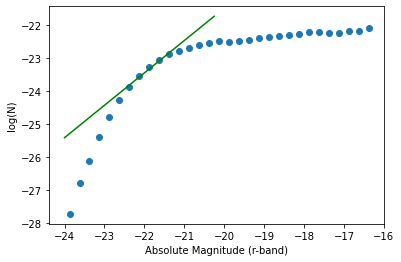

In [19]:
mbins = np.arange(-24,-16,0.25)
hist,edges = np.histogram(M_r,bins=mbins,weights=1/V_max)
bincenters=0.5*(mbins[1:]+mbins[:-1])
logN = np.log10(hist)
plt.xlabel("Absolute Magnitude (r-band)")
plt.ylabel("log(N)")
plt.scatter(bincenters,logN)

mbins_line = np.arange(-22.5,-21,0.25)
hist_line,edges_line = np.histogram(M_r,bins=mbins_line,weights=1/V_max)
bincenters_line = 0.5*(mbins_line[1:]+mbins_line[:-1])
logN_line = np.log10(hist_line)
z = np.polyfit(bincenters_line, logN_line, 1)
mbins_pline = np.arange(-24,-20,0.25)
y = z[0] * mbins_pline + z[1] 
plt.plot(mbins_pline, y, c = 'green')
print("alpha =", z[0])

To find the value of alpha, one should be able to define the start and end of the faint end accurately. Therefore, this causes some errors. Other systematic errors can happen due to errors in the measurement devices. 

Problem II